In [31]:
#Import libraries

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import math
import matplotlib.pyplot as plt

In [32]:
#Load Dataset

train_dataset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform=torchvision.transforms.ToTensor())

In [33]:
#Data Splitting

train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)
val_loader = DataLoader(dataset = val_dataset, batch_size = 64, shuffle = False)

In [34]:
# Creating NN

import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)  # New layer
        self.fc5 = nn.Linear(32, 16)  # New layer
        self.fc6 = nn.Linear(16, 10)  # New layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.softmax = nn.Softmax(dim=1)
   

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)
        return x

In [35]:
model = NeuralNetwork()

criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification tasks

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    if epoch % 50 == 49:
        print(f"Epoch {epoch + 1}, Training Loss: {epoch_loss}")

    # Validation loss
    val_running_loss = 0.0
    for val_data in val_loader:
        val_inputs, val_labels = val_data
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item()

    val_epoch_loss = val_running_loss / len(val_loader)
    val_losses.append(val_epoch_loss)

    if epoch % 50 == 49:
        print(f"Epoch {epoch + 1}, Validation Loss: {val_epoch_loss}")

Epoch 50, Training Loss: 0.4533241141293603
Epoch 50, Validation Loss: 0.6588471662371781
Epoch 100, Training Loss: 0.41617525753372514
Epoch 100, Validation Loss: 0.8285456964639342
Epoch 150, Training Loss: 0.40779263999607007
Epoch 150, Validation Loss: 0.7731114020867712
Epoch 200, Training Loss: 0.4114025046369796
Epoch 200, Validation Loss: 0.8504011765786796
Epoch 250, Training Loss: 0.3709773504054114
Epoch 250, Validation Loss: 0.764117630186734
Epoch 300, Training Loss: 0.37539319241288377
Epoch 300, Validation Loss: 1.2021184598754167
Epoch 350, Training Loss: 0.3648956515498634
Epoch 350, Validation Loss: 0.9482579834901603
Epoch 400, Training Loss: 0.37250344119251155
Epoch 400, Validation Loss: 0.9550733064200468
Epoch 450, Training Loss: 0.3745603981350404
Epoch 450, Validation Loss: 0.8647683776298146
Epoch 500, Training Loss: 0.3654652090429434
Epoch 500, Validation Loss: 1.0127132026727792


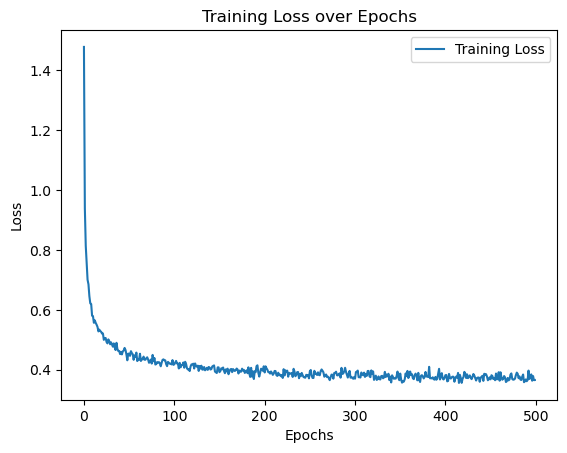

In [36]:
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

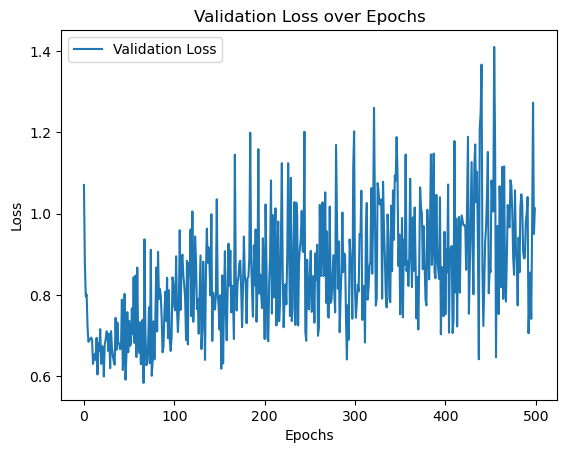

In [37]:
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score


model.eval()
train_predictions = []
train_targets = []

with torch.no_grad():
    for data in train_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        train_predictions.extend(predicted.cpu().numpy())
        train_targets.extend(labels.cpu().numpy())


train_accuracy = accuracy_score(train_targets, train_predictions)
train_precision = precision_score(train_targets, train_predictions, average='weighted')
train_recall = recall_score(train_targets, train_predictions, average='weighted')
train_f1 = f1_score(train_targets, train_predictions, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 0.9866833333333334
Training Precision: 0.9868702601063036
Training Recall: 0.9866833333333334
Training F1 Score: 0.9867156300964149


In [40]:
# After training, evaluate on the test set
model.eval()

test_predictions = []
test_targets = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_targets.extend(labels.cpu().numpy())


test_accuracy = accuracy_score(test_targets, test_predictions)
test_precision = precision_score(test_targets, test_predictions, average='weighted')
test_recall = recall_score(test_targets, test_predictions, average='weighted')
test_f1 = f1_score(test_targets, test_predictions, average='weighted')

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 0.9701
Test Precision: 0.9703776127477993
Test Recall: 0.9701
Test F1 Score: 0.9701369755066553
